In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
learning_rate = 0.01
training_epoch = 30
batch_size = 100
n_hidden = 256
n_input = 28*28

In [7]:
X = tf.placeholder(tf.float32, [None, n_input])
W1 = tf.Variable(tf.random_normal([n_input, n_hidden]))
b1 = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([n_hidden, n_input]))
b2 = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.matmul(encoder,W2)+b2)

cost = tf.reduce_mean(tf.pow(X-decoder,2))
train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for _ in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_xs})
        cost_val = sess.run(cost, feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', (epoch+1), 'Avg. cost = {:.4f}'.format(total_cost/total_batch))

print('최적화 완료!')

Epoch: 1 Avg. cost = 0.1921
Epoch: 2 Avg. cost = 0.0536
Epoch: 3 Avg. cost = 0.0422
Epoch: 4 Avg. cost = 0.0382
Epoch: 5 Avg. cost = 0.0358
Epoch: 6 Avg. cost = 0.0342
Epoch: 7 Avg. cost = 0.0331
Epoch: 8 Avg. cost = 0.0318
Epoch: 9 Avg. cost = 0.0296
Epoch: 10 Avg. cost = 0.0285
Epoch: 11 Avg. cost = 0.0265
Epoch: 12 Avg. cost = 0.0259
Epoch: 13 Avg. cost = 0.0256
Epoch: 14 Avg. cost = 0.0255
Epoch: 15 Avg. cost = 0.0253
Epoch: 16 Avg. cost = 0.0252
Epoch: 17 Avg. cost = 0.0252
Epoch: 18 Avg. cost = 0.0250
Epoch: 19 Avg. cost = 0.0248
Epoch: 20 Avg. cost = 0.0245
Epoch: 21 Avg. cost = 0.0244
Epoch: 22 Avg. cost = 0.0231
Epoch: 23 Avg. cost = 0.0224
Epoch: 24 Avg. cost = 0.0217
Epoch: 25 Avg. cost = 0.0213
Epoch: 26 Avg. cost = 0.0212
Epoch: 27 Avg. cost = 0.0208
Epoch: 28 Avg. cost = 0.0206
Epoch: 29 Avg. cost = 0.0205
Epoch: 30 Avg. cost = 0.0205
최적화 완료!


In [21]:
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

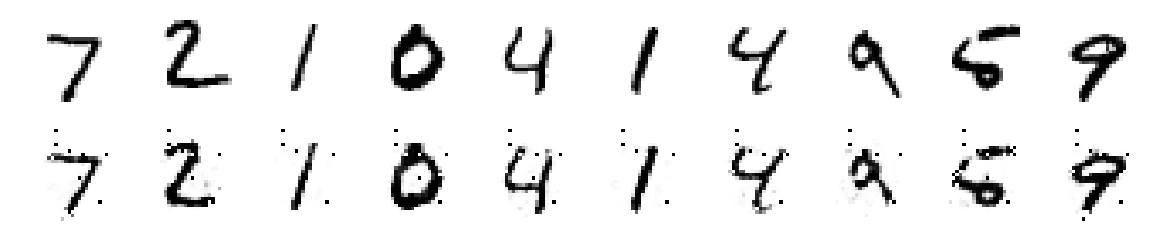

In [23]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size*2, 4))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(mnist.test.images[i].reshape(28,28), cmap=plt.cm.binary)
    ax[1][i].imshow(samples[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()